# <center><font color ="red">Tp7 Suivi de l’évolution d’une transformation chimique par spectrophotométrie  </font></center>

**Capacité numérique** : À l’aide d’un langage de programmation et à partir de données expérimentales, tracer l’évolution temporelle d’une concentration, d’une vitesse volumique d’apparition ou de disparition et tester une relation entre la vitesse volumique de disparition et la concentration d'un réactif.

## <font color=#3D6BBC > 2. Relation entre [I$_{2}$] et et l'absorbance A </font>

In [1]:
#Importation des bibliothèques nécessaires
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

- ### <font color=red>récupération des mesures d'absorbances </font>

In [2]:
#Création d'un dictionnaire contenant les valeurs de d'absorbances mesurées
mesures = []
with open('tp7_etalonnage.csv', newline='') as csvfile:
    file = csv.DictReader(csvfile, delimiter=";")
    for ligne in file:
        mesures.append(dict(ligne))

print(np.array(mesures))   #affichage du tableau de mesures

[{'[I2] (mol/L)': '0', 'A': '0'} {'[I2] (mol/L)': '0.0005', 'A': '0.267'}
 {'[I2] (mol/L)': '0.001', 'A': '0.511'}
 {'[I2] (mol/L)': '0.0025', 'A': '1.215'}
 {'[I2] (mol/L)': '0.004', 'A': '1.9'}
 {'[I2] (mol/L)': '0.005', 'A': '2.301'}]


- ### <font color=red> Préparation de la liste C contenant les valeurs des concentrations de diiode et de la liste A contenant les valeurs d'absorbance</font>

In [3]:
C=[] 
A=[]
for couple in mesures:
    C.append(float(couple['[I2] (mol/L)']))
    A.append(float(couple['A']))
print("Liste C contenant les valeurs de la concentration de diiode :")
print(np.array(C))
print()
print("Liste A contenant les valeurs d'absorbance :")
print(np.array(A))

Liste C contenant les valeurs de la concentration de diiode :
[0.     0.0005 0.001  0.0025 0.004  0.005 ]

Liste A contenant les valeurs d'absorbance :
[0.    0.267 0.511 1.215 1.9   2.301]


- ### <font color=red>Tracé de la courbe d'étalonnage A en fonction de [I$_{2}$]</font>

> **Document 1**   
La fonction np.polyfit(x,y,1) modélise le nuage de points de coordonnées (x,y) par une droite d'équation y = ax+b et renvoie les valeurs a et b.

k =  4.61e+02  b =  3.42e-02


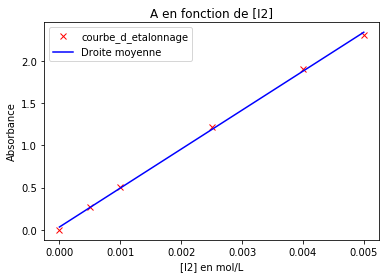

In [4]:
#Tracé du nuage de points
nom="courbe_d_etalonnage"
plt.plot(C,A,"rx",label=nom) #Voir mémo python de votre livre p 541

#Titres des axes et du graphique
plt.title("A en fonction de [I2]",color='black')
plt.ylabel('Absorbance')#nom de l'axe des ordonnées
plt.xlabel("[I2] en mol/L")#nom des axes des abscisses

#modélisation linéaire de la courbe
#k=coef directeur de la droite
#b=ordonnée à l'origine
k,b = np.polyfit(C,A,1)

#écriture de k et b en notation scientifique avec deux chiffres après la virgule
print("k = ", format(k,".2e")," b = " ,format(b,".2e")) 


#création du tableau des ordonnées A pour tracer la droite moyenne
A_mod=[]
for i in range(len(C)):
    Ai=k*C[i]+b     
    A_mod.append(Ai)

#Tracé de la droite moyenne
plt.plot(C,A_mod,"b-",label="Droite moyenne")

#affichage de la légende
plt.legend()
plt.show() 


<div class = "alert alert-info">  

**Question 2.5**:  
En vous aidant du document 1 et des résultats du programme précédent, donner la relation entre A et [I$_{2}$]. (dans la cellule ci-dessous) 
La loi de Beer-Lambert est-elle vérifiée?
</div>

A = 4.61x10$^{2}$ x [I$_{2}$]

B très proche de 0 donc A = k x [I$_{2}$]
A est bien proportionnel à [I$_{2}$]. La loi de Beer-Lambert est vérifiée.

## <font color=#3D6BBC > 3.	Suivi spectrophotométrique d’une transformation chimique ne faisant intervenir qu’une réaction chimique : oxydation des ions iodure par les ions peroxodisulfate S$_{2}$O$_{8}$$^{2-}$  </font>

- ### <font color=red>récupération des mesures d'absorbances en fonction du temps</font>

In [5]:
###### Création d'un dictionnaire contenant les valeurs de d'absorbances mesurées lors du suivi 
suivi_spectro = []
with open('tp7_suivi_par_spectro-prof.csv', newline='') as csvfile:
    file = csv.DictReader(csvfile, delimiter=";")
    for ligne in file:
        suivi_spectro.append(dict(ligne))

print(np.array(suivi_spectro))

[{'date ti de prélèvement (min)': '0', 'A': '0.00'}
 {'date ti de prélèvement (min)': '2', 'A': '0.333'}
 {'date ti de prélèvement (min)': '3.5', 'A': '0.6'}
 {'date ti de prélèvement (min)': '6', 'A': '0.913'}
 {'date ti de prélèvement (min)': '8', 'A': '1.154'}
 {'date ti de prélèvement (min)': '10.5', 'A': '1.373'}
 {'date ti de prélèvement (min)': '13', 'A': '1.559'}
 {'date ti de prélèvement (min)': '15', 'A': '1.691'}
 {'date ti de prélèvement (min)': '18', 'A': '1.852'}
 {'date ti de prélèvement (min)': '22', 'A': '2.016'}
 {'date ti de prélèvement (min)': '25', 'A': '2.107'}
 {'date ti de prélèvement (min)': '30', 'A': '2.205'}
 {'date ti de prélèvement (min)': '35', 'A': '2.27'}
 {'date ti de prélèvement (min)': '40', 'A': '2.312'}
 {'date ti de prélèvement (min)': '45', 'A': '2.334'}
 {'date ti de prélèvement (min)': '50', 'A': '2.358'}
 {'date ti de prélèvement (min)': '55', 'A': '2.37'}]


- ### <font color=red> Préparation de la liste t contenant les valeurs des dates et de la liste A_t contenant les valeurs des absorbances mesurées à l'instant t </font>

In [6]:
A_t=[] # récupération des valeurs d'absorbance
t=[] # récupération des valeurs du temps
for couple in suivi_spectro:
    A_t.append(float(couple['A']))
    t.append(float(couple['date ti de prélèvement (min)']))
print("Liste des dates t (min) :  ")
print(np.array(t))
print()
print("Liste des absorbances mesurées aux dates t :  ")
print(np.array(A_t))


Liste des dates t (min) :  
[ 0.   2.   3.5  6.   8.  10.5 13.  15.  18.  22.  25.  30.  35.  40.
 45.  50.  55. ]

Liste des absorbances mesurées aux dates t :  
[0.    0.333 0.6   0.913 1.154 1.373 1.559 1.691 1.852 2.016 2.107 2.205
 2.27  2.312 2.334 2.358 2.37 ]


- ### <font color=red> On souhaite maintenant tracer la concentration de diiode formé [I$_{2}$] en fonction du temps </font>

<div class = "alert alert-info">  

**Question 3.1**:   
    En vous aidant de la relation obtenue dans le 2., compléter la partie de code encadrée ci-dessous
</div>

In [7]:
#Initialisation de la liste contenant les concentrations de I2 formé au cours du temps
C_t=[] 

#---------------partie de code à compléter----------------------------------
#Calcul de la concentration [I2] en fonction du temps 
for i in range(len(A_t)):
    Ci= A_t[i]/k # à compléter
    C_t.append(Ci)
#----------------------------------------------------------------------

#Affichage des concentrations calculées
print(np.array(C_t))



[0.         0.00072288 0.00130249 0.00198196 0.00250512 0.00298053
 0.00338431 0.00367085 0.00402036 0.00437637 0.00457391 0.00478665
 0.00492776 0.00501893 0.00506669 0.00511879 0.00514484]


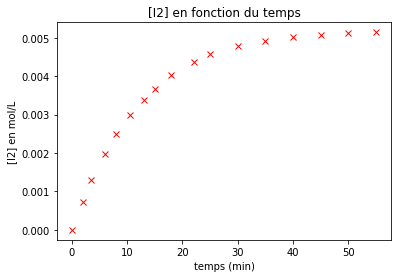

In [8]:
#------------------------------------------------------------------------------
#   Tracé de la concentration de diiode formé au cours du temps
#------------------------------------------------------------------------------

plt.plot(t,C_t,"rx") 

#Titres des axes et du graphique
plt.title("[I2] en fonction du temps",color='black')
plt.ylabel('[I2] en mol/L')#nom de l'axe des ordonnées
plt.xlabel("temps (min)")#nom des axes des abscisses

plt.show() 

<div class = "alert alert-info">  

**Question 3.2**:   
    En observant la courbe obtenue ci-dessus, indiquer à partir de quelle date on peut considérer que la transformation chimique est terminée.
 </div>

- ### <font color=red> On souhaite maintenant tracer la concentration des ions peroxodisulfates formés [S$_{2}$O$_{8}$$^{2-}$ ] en fonction du temps </font>

  <div class = "alert alert-info">  

**Question 3.3**:   
Exprimer la quantité de diiode n (I$_{2}$) formé au cours du temps en fonction de la concentration de [I$_{2}$].   
(la réponse peut-être mise sur votre feuille de compte-rendu de tp.)
 </div>

D'après l'équation de la réaction, n (I$_{2}$) = [I$_{2}$](V$_{1}$ +V$_{2}$)

  <div class = "alert alert-info">  

**Question 3.4**:   
D'après l'équation de la réaction, établir la relation entre la quantité d'ions peroxodisulfates restants n(S$_{2}$O$_{8}$$^{2-}$) , la quantité de diiode n (I$_{2}$) formés, C$_{1}$ et V$_{1}$.        
(la réponse peut-être mise sur votre feuille de compte-rendu de tp.)
 </div>

n(S$_{2}$O$_{8}$$^{2-}$) = n$_{i}$(S$_{2}$O$_{8}$$^{2-}$)  -  n (I$_{2}$)

Soit n(S$_{2}$O$_{8}$$^{2-}$) = C$_{1}$  x  V $_{1}$  -  n (I$_{2}$)

  <div class = "alert alert-info">  

**Question 3.5**:   
En déduire la concentration des ions peroxodisulfate [S$_{2}$O$_{8}$$^{2-}$]  en fonction de la concentration de diiode [I$_{2}$].     
(la réponse peut-être mise sur votre feuille de compte-rendu de tp.)
 </div>

[S$_{2}$O$_{8}$$^{2-}$]  = $\frac{n(S_{2}O_{8}^{2-})}{V_{1} +V_{2}}$    

soit [S$_{2}$O$_{8}$$^{2-}$]  = $\frac{C_{1}  x  V_{1} -  n (I_{2})}{V_{1} +V_{2}}$    

d'où   [S$_{2}$O$_{8}$$^{2-}$]  = $\frac{C_{1}  x  V_{1} -  [I_{2}](V_{1} +V_{2})}{V_{1} +V_{2}}$   

Après simplification, il reste : [S$_{2}$O$_{8}$$^{2-}$]  = $\frac{C_{1}  x  V_{1}}{V_{1} +V_{2}}$ - [I$_{2}$]

<div class = "alert alert-info">  

**Question 3.6**:   
Compléter le code ci-dessous pour calculer les concentrations des ions peroxodisulfate en fonction du temps : [S$_{2}$O$_{8}$$^{2-}$].   

On appelle C_peroxo cette concentration.
 </div>

In [9]:
#Initialisation de la liste contenant les concentrations d'ion peroxodisulfate formé au cours du temps
C_peroxo=[] 

#---------------partie de code à compléter----------------------------------
#Calcul de la concentration en ions peroxodisulfates en fonction du temps 
for i in range(len(C_t)):
    Ci= 0.005-C_t[i] # à compléter
    C_peroxo.append(Ci)
#----------------------------------------------------------------------

#Affichage des concentrations calculées
print(np.array(C_peroxo))



[ 5.00000000e-03  4.27711744e-03  3.69750890e-03  3.01804270e-03
  2.49487544e-03  2.01946619e-03  1.61569395e-03  1.32914591e-03
  9.79644128e-04  6.23629893e-04  4.26085409e-04  2.13345196e-04
  7.22419929e-05 -1.89323843e-05 -6.66903915e-05 -1.18790036e-04
 -1.44839858e-04]


<div class = "alert alert-info">  

**Question 3.7**:   
Compléter le code ci-dessous pour tracer l'évolution de la concentration en ions peroxodisulfates en fonction du temps.   

 </div>

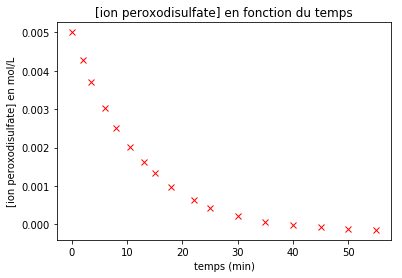

In [10]:
#------------------------------------------------------------------------------
#   Tracé de la concentration des ions peroxodisulfate restant au cours du temps
#------------------------------------------------------------------------------

#---------------partie de code à compléter----------------------------------
plt.plot(t,C_peroxo,"rx") 

#Titres des axes et du graphique
plt.title("[ion peroxodisulfate] en fonction du temps",color='black')
plt.ylabel('[ion peroxodisulfate] en mol/L')#nom de l'axe des ordonnées
plt.xlabel("temps (min)")#nom des axes des abscisses

plt.show() 

#----------------------------------------------------------------------------

- ### <font color=red> On souhaite maintenant tracer la vitesse volumique de disparition des ions peroxodisulfate  en fonction du temps </font>

![center](vitesse-disparition-reactif.png)

<div class = "alert alert-info">  

**Question 3.8**:   
    En vous aidant du document précédent, compléter la partie de code encradrée ci-dessous permettant de calculer la vitesse volumique de disparition des ions peroxodisulfate.   
</div>

In [11]:
#Calcul de la vitesse volumique de disparition des ions peroxodisulfates en fonction du temps
v=[] #initisation de la liste contenant les vitesses

#------------Partie de code à compléter --------------------------------

for i in range (0,len(C_t)-1):  #ligne à expliquer dans la question 3.9.
    
    vi=-((C_peroxo[i+1]-C_peroxo[i])/(t[i+1]-t[i]))# à compléter
    v.append(vi)
    
#----------------------------------------------------------------------

print(np.array(v))




[3.61441281e-04 3.86405694e-04 2.71786477e-04 2.61583630e-04
 1.90163701e-04 1.61508897e-04 1.43274021e-04 1.16500593e-04
 8.90035587e-05 6.58481613e-05 4.25480427e-05 2.82206406e-05
 1.82348754e-05 9.55160142e-06 1.04199288e-05 5.20996441e-06]


<div class = "alert alert-info">  

**Question 3.9**:   
    Expliquer la ligne : for i in range (0,len(C_t)-1):
 </div>

[ 0.   2.   3.5  6.   8.  10.5 13.  15.  18.  22.  25.  30.  35.  40.
 45.  50. ]


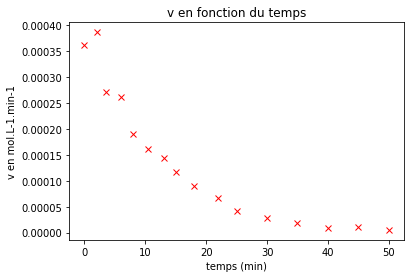

In [12]:
#--------------------------------------------------------------------------------------------------
#   Tracé de la vitesse volumique de disparition des ions peroxodisulfate en fonction du temps
#--------------------------------------------------------------------------------------------------
#Il faut enlever la dernière valeurs du temps
temps=np.delete(t,len(t)-1) 

print(np.array(temps))
plt.plot(temps,v,"rx") 

#Titres des axes et du graphique
plt.title("v en fonction du temps",color='black')
plt.ylabel('v en mol.L-1.min-1')#nom de l'axe des ordonnées
plt.xlabel("temps (min)")#nom des axes des abscisses

plt.show() 

<div class = "alert alert-info">  

**Question 3.10**:   
Compléter la partie de code permettant de tracer la vitesse volumique de disparition des ions peroxodisulfates en fonction de la concentration en ions peroxodisulfates restants.

 </div>

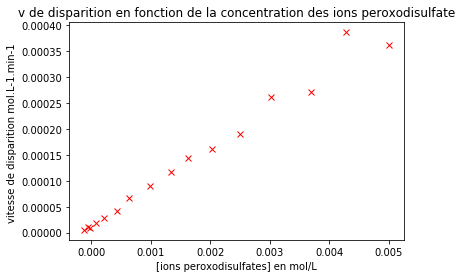

In [13]:
#------------------------------------------------------------------------------
#   Tracé de la la vitesse volumique de disparition des ions peroxodisulfate en 
#    fonction de la concentration en ions peroxodisulfate
#------------------------------------------------------------------------------

#Il faut enlever la dernière valeurs de la concentration
C_peroxo=np.delete(C_peroxo,len(t)-1) 

#---------------partie de code à compléter----------------------------------
plt.plot(C_peroxo,v,"rx")  # Ligne à compléter

#Titres des axes et du graphique
plt.title("v de disparition en fonction de la concentration des ions peroxodisulfate",color='black')
plt.ylabel('vitesse de disparition mol.L-1.min-1 ')#nom de l'axe des ordonnées   # Ligne à compléter
plt.xlabel("[ions peroxodisulfates] en mol/L")#nom des axes des abscisses      # Ligne à compléter


plt.show() 

#----------------------------------------------------------------------------

<div class = "alert alert-info">  

**Question 3.11**:   
En vous aidant du document ci-dessous, déterminer si la réaction étudiée est d'ordre 1. 

 </div>

![center](loi-ordre-un.png)

- ### <font color=red> <u>Vérification :</u> réaction d'ordre 1 </font>

k =  7.56e-02  b =  1.43e-05


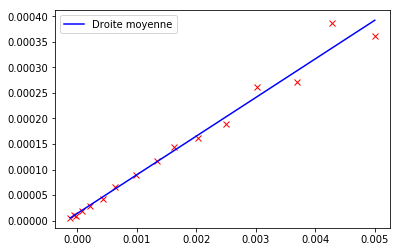

In [14]:
#modélisation linéaire de la courbe
#k=coef directeur de la droite
#b=ordonnée à l'origine
k,b = np.polyfit(C_peroxo,v,1)
plt.plot(C_peroxo,v,"rx")
#écriture de k et b en notation scientifique avec deux chiffres après la virgule
print("k = ", format(k,".2e")," b = " ,format(b,".2e")) 


#création du tableau des ordonnées A pour tracer la droite moyenne
v_mod=[]
for i in range(len(C_peroxo)):
    vi=k*C_peroxo[i]+b     
    v_mod.append(vi)

#Tracé de la droite moyenne
plt.plot(C_peroxo,v_mod,"b-",label="Droite moyenne")

#affichage de la légende
plt.legend()
plt.show() 
